In [1]:
import librosa
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

audio_file_path='datasets/drinking_2.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [2]:
print(librosa_audio_data)

[ 3.9842995e-04  9.6722004e-05  8.3976710e-04 ... -1.3657064e-03
 -1.8422189e-03  0.0000000e+00]


Text(0.5, 0, 'Time (samples) ')

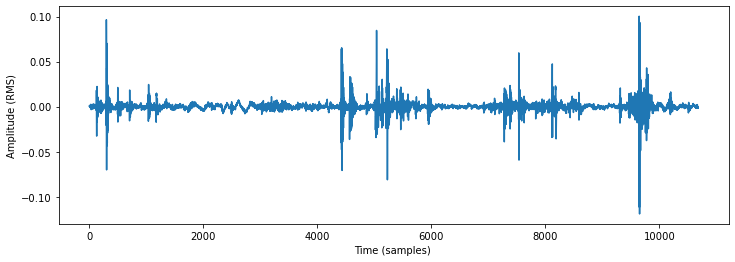

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)
plt.ylabel("Amplitude (RMS)")
plt.xlabel("Time (samples) ")

In [4]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [5]:
wave_audio

array([[  58,   -8],
       [   1,   -6],
       [   5,   15],
       ...,
       [ -10, -109],
       [  43, -105],
       [  36, -101]], dtype=int16)

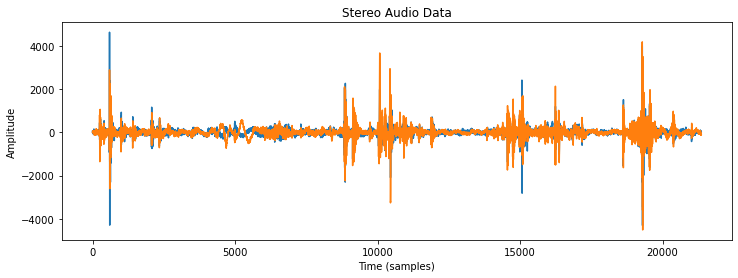

In [6]:
import matplotlib.pyplot as plt

# Original audio in stereo
plt.figure(figsize=(12, 4))
plt.title("Stereo Audio Data")
plt.ylabel("Amplitude")
plt.xlabel("Time (samples)")
plt.plot(wave_audio)

In [7]:
# MFCC Extraction begin here 
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 21)


In [8]:
mfccs

array([[-3.36948334e+02, -3.09772766e+02, -3.51633453e+02,
        -3.95735138e+02, -4.26329132e+02, -4.16935181e+02,
        -3.91037994e+02, -3.96246857e+02, -3.46642792e+02,
        -2.70388611e+02, -2.59924072e+02, -2.96747864e+02,
        -3.94313110e+02, -4.03914886e+02, -3.29968506e+02,
        -2.97518921e+02, -3.01844116e+02, -3.50153442e+02,
        -2.95842224e+02, -2.56269440e+02, -3.24376678e+02],
       [-2.77668552e+01, -1.56258669e+01,  1.81101151e+01,
         4.08536606e+01,  5.45735550e+01,  4.99994926e+01,
         2.62772064e+01,  2.31380005e+01,  1.52458916e+01,
         6.65335388e+01,  1.10461258e+02,  1.03173096e+02,
         6.13016434e+01,  3.96889992e+01, -3.25895977e+00,
         7.59910297e+00,  5.07577324e+01,  4.80663605e+01,
        -1.08920326e+01, -1.57424669e+01, -3.06812215e+00],
       [-3.03922729e+01, -2.60005379e+01, -2.55652695e+01,
        -1.85084114e+01,  1.22776222e+01,  1.94835663e+01,
         1.12189102e+01,  1.51349068e+01, -1.11252613e

In [9]:
audio_dataset_path='datasets'
metadata=pd.read_csv('metadata.csv')
metadata.head(50)

,file_name,classID,class
0,drinking_1,1,drinking
1,drinking_2,1,drinking
2,drinking_3,1,drinking
3,drinking_4,1,drinking
4,drinking_5,1,drinking
5,drinking_6,1,drinking
6,drinking_7,1,drinking
7,drinking_8,1,drinking
8,drinking_9,1,drinking
9,drinking_10,1,drinking


In [10]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [11]:
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["file_name"]))
    print(file_name)

46it [00:00, 5764.16it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_1
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_2
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_3
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_4
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_5
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_6
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_7
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_8
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_9
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_10
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_11
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_12
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\a

In [12]:
# Loop for extracting
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["file_name"])+'.wav')
    print(file_name)
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

0it [00:00, ?it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_1.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_2.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_3.wav


4it [00:00, 32.87it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_4.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_5.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_6.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_7.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_8.wav


8it [00:00, 17.20it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_9.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_10.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_11.wav


13it [00:00, 13.92it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_12.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_13.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_14.wav


15it [00:01, 13.40it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_15.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_16.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_17.wav


19it [00:01, 14.20it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_18.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_19.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_20.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_21.wav


21it [00:01, 13.78it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\drinking_22.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_1.wav


23it [00:01, 12.32it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_2.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_3.wav


25it [00:01, 11.01it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_4.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_5.wav


27it [00:02,  9.67it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_6.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_7.wav


30it [00:02,  8.00it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_8.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_9.wav


32it [00:02,  7.86it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_10.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_11.wav


34it [00:03,  8.22it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_12.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_13.wav


36it [00:03,  6.90it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_14.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_15.wav


38it [00:03,  6.77it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_16.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_17.wav


40it [00:03,  7.56it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_18.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_19.wav


42it [00:04,  7.38it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_20.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_21.wav


44it [00:04,  7.23it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_22.wav
C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_23.wav


46it [00:04,  9.63it/s]

C:\Users\hsoon\Documents\GitHub\smartPetMonitor\audioModel\datasets\eating_24.wav


In [13]:
# converting extracted spectral features of drinking and eating to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head(50)

,feature,class
0,"[-328.13235, 65.59392, -38.67034, 5.4069195, -...",drinking
1,"[-349.1521, 42.501, -31.456572, 26.431646, -8....",drinking
2,"[-320.457, 63.11254, -37.251663, 11.011499, -7...",drinking
3,"[-372.14014, 41.927353, -35.56491, 37.086433, ...",drinking
4,"[-391.85886, 51.45333, -27.665045, 38.51123, -...",drinking
5,"[-393.057, 52.509537, -32.272507, 42.311592, -...",drinking
6,"[-369.73642, 54.400322, -21.231102, 18.65339, ...",drinking
7,"[-367.96658, 33.382534, -21.234934, 23.701822,...",drinking
8,"[-374.245, 40.232742, -26.485298, 29.021275, -...",drinking
9,"[-329.38553, 47.81891, -35.86021, 9.928306, -2...",drinking


In [14]:
# Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())
X.shape

(46, 40)

In [15]:
y

array(['drinking', 'drinking', 'drinking', 'drinking', 'drinking',
       'drinking', 'drinking', 'drinking', 'drinking', 'drinking',
       'drinking', 'drinking', 'drinking', 'drinking', 'drinking',
       'drinking', 'drinking', 'drinking', 'drinking', 'drinking',
       'drinking', 'drinking', 'eating', 'eating', 'eating', 'eating',
       'eating', 'eating', 'eating', 'eating', 'eating', 'eating',
       'eating', 'eating', 'eating', 'eating', 'eating', 'eating',
       'eating', 'eating', 'eating', 'eating', 'eating', 'eating',
       'eating', 'eating'], dtype='<U8')

In [16]:
### MODEL TRAINING from here onwards ###
!pip install tensorflow

In [17]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [18]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0) 

In [19]:
X_train

array([[-4.9770236e+02,  7.0039200e+01, -1.0797926e+01, ...,
         8.0093187e-01,  1.0071138e+00,  8.0542064e-01],
       [-4.7507056e+02,  9.0369804e+01, -5.6311278e+00, ...,
        -8.8141978e-02,  7.2443050e-01,  1.1776613e+00],
       [-4.5099399e+02,  8.3405350e+01, -1.7117874e+01, ...,
        -8.0003667e-01,  7.8147674e-01,  1.0357746e+00],
       ...,
       [-3.7214014e+02,  4.1927353e+01, -3.5564911e+01, ...,
        -2.4844568e+00, -1.3844047e+00, -2.1689005e+00],
       [-3.2813235e+02,  6.5593918e+01, -3.8670341e+01, ...,
        -8.6936939e-01, -9.8114926e-01,  1.3255457e+00],
       [-4.7582233e+02,  9.7280510e+01, -1.3610668e+01, ...,
        -3.2073024e-01,  6.5628505e-01, -3.1834713e-03]], dtype=float32)

In [20]:
X_train.shape

(36, 40)

In [21]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [22]:
y_train.shape

(36, 2)

In [23]:
import tensorflow as tf 
print(tf.__version__)

2.8.0


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [25]:
### No of classes
num_labels=y.shape[1]

In [26]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [28]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [29]:
# Trianing... 
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='models/drinking_rec.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
1/2 [==============>...............] - ETA: 0s - loss: 43.7565 - accuracy: 0.3125
Epoch 1: val_loss improved from inf to 5.04760, saving model to models\drinking_rec.hdf5
2/2 [==============================] - 1s 200ms/step - loss: 42.0326 - accuracy: 0.3611 - val_loss: 5.0476 - val_accuracy: 0.6000
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 29.7999 - accuracy: 0.5000
Epoch 2: val_loss improved from 5.04760 to 1.59242, saving model to models\drinking_rec.hdf5
2/2 [==============================] - 0s 54ms/step - loss: 29.7413 - accuracy: 0.5000 - val_loss: 1.5924 - val_accuracy: 0.6000
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 32.0890 - accuracy: 0.4375
Epoch 3: val_loss improved from 1.59242 to 1.08738, saving model to models\drinking_rec.hdf5
2/2 [==============================] - 0s 63ms/step - loss: 30.9686 - accuracy: 0.4167 - val_loss: 1.0874 - val_accuracy: 0.5000
Epoch 4/100
1/2 [==============>...............] - ETA:

2/2 [==============================] - 0s 26ms/step - loss: 13.7692 - accuracy: 0.5278 - val_loss: 2.0638 - val_accuracy: 0.4000
Epoch 31/100
1/2 [==============>...............] - ETA: 0s - loss: 11.0301 - accuracy: 0.5938
Epoch 31: val_loss did not improve from 0.55634
2/2 [==============================] - 0s 31ms/step - loss: 11.2828 - accuracy: 0.6111 - val_loss: 2.3971 - val_accuracy: 0.4000
Epoch 32/100
1/2 [==============>...............] - ETA: 0s - loss: 11.5794 - accuracy: 0.5625
Epoch 32: val_loss did not improve from 0.55634
2/2 [==============================] - 0s 27ms/step - loss: 11.3899 - accuracy: 0.5556 - val_loss: 2.0982 - val_accuracy: 0.4000
Epoch 33/100
1/2 [==============>...............] - ETA: 0s - loss: 13.5111 - accuracy: 0.5312
Epoch 33: val_loss did not improve from 0.55634
2/2 [==============================] - 0s 31ms/step - loss: 12.8017 - accuracy: 0.5278 - val_loss: 1.4439 - val_accuracy: 0.4000
Epoch 34/100
1/2 [==============>...............] - ETA

2/2 [==============================] - 0s 24ms/step - loss: 6.1892 - accuracy: 0.6389 - val_loss: 0.8385 - val_accuracy: 0.9000
Epoch 61/100
1/2 [==============>...............] - ETA: 0s - loss: 8.7395 - accuracy: 0.6562
Epoch 61: val_loss did not improve from 0.28455
2/2 [==============================] - 0s 26ms/step - loss: 7.9478 - accuracy: 0.6667 - val_loss: 0.9955 - val_accuracy: 0.9000
Epoch 62/100
1/2 [==============>...............] - ETA: 0s - loss: 8.2388 - accuracy: 0.6250
Epoch 62: val_loss did not improve from 0.28455
2/2 [==============================] - 0s 27ms/step - loss: 7.3527 - accuracy: 0.6389 - val_loss: 1.1045 - val_accuracy: 0.9000
Epoch 63/100
1/2 [==============>...............] - ETA: 0s - loss: 6.8000 - accuracy: 0.6875
Epoch 63: val_loss did not improve from 0.28455
2/2 [==============================] - 0s 24ms/step - loss: 6.9418 - accuracy: 0.6667 - val_loss: 1.1733 - val_accuracy: 0.9000
Epoch 64/100
1/2 [==============>...............] - ETA: 0s - 

1/2 [==============>...............] - ETA: 0s - loss: 5.5786 - accuracy: 0.5625
Epoch 90: val_loss did not improve from 0.22184
2/2 [==============================] - 0s 26ms/step - loss: 5.0247 - accuracy: 0.5833 - val_loss: 0.4082 - val_accuracy: 0.9000
Epoch 91/100
1/2 [==============>...............] - ETA: 0s - loss: 4.9878 - accuracy: 0.5938
Epoch 91: val_loss did not improve from 0.22184
2/2 [==============================] - 0s 27ms/step - loss: 4.4336 - accuracy: 0.6389 - val_loss: 0.3582 - val_accuracy: 0.9000
Epoch 92/100
1/2 [==============>...............] - ETA: 0s - loss: 4.6093 - accuracy: 0.6562
Epoch 92: val_loss did not improve from 0.22184
2/2 [==============================] - 0s 25ms/step - loss: 6.4402 - accuracy: 0.6111 - val_loss: 0.2857 - val_accuracy: 0.9000
Epoch 93/100
1/2 [==============>...............] - ETA: 0s - loss: 5.9209 - accuracy: 0.5312
Epoch 93: val_loss did not improve from 0.22184
2/2 [==============================] - 0s 25ms/step - loss: 5

In [30]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.800000011920929


In [31]:
import random
drink_or_eat = str(random.randint(0,1))
file_num = str(random.randint(1,22))
if drink_or_eat == '0': 
    string="drinking"
elif drink_or_eat == '1': 
    string ="eating"
testfile = string+"_"+file_num+".wav"
testfile

'eating_5.wav'

File to be analyzed by the model: datasets/drinking_21.wav 

Extracted spectral feature array: 

[-6.6741858e+02  1.0688672e+02 -2.7120957e+00  5.1593700e+01
 -5.8296628e+00  5.3923710e+01  3.1012151e+00  2.8133688e+01
 -3.4521775e+00  2.1857107e+01 -6.9772639e+00  7.8439236e+00
 -8.2878504e+00  4.5321956e+00 -4.9420743e+00  3.8046479e+00
  1.9507998e+00 -2.0394533e+00 -2.5236504e+00 -2.7126276e+00
 -1.3067344e-01 -3.5835199e+00 -3.4159968e+00 -3.9388590e+00
  2.3689480e+00 -3.1679094e+00  1.6457427e-01 -2.6278889e+00
  3.4499365e-01 -2.6740463e+00  5.2048609e-02 -3.8365939e+00
 -1.6664605e+00 -1.3444203e+00 -1.8496522e+00 -3.6753407e+00
 -3.2048609e+00 -3.2707102e+00 -1.7675380e+00 -2.6879599e+00]

Model outcome Label:  [[0 1]]

Final classified behavior: Eating


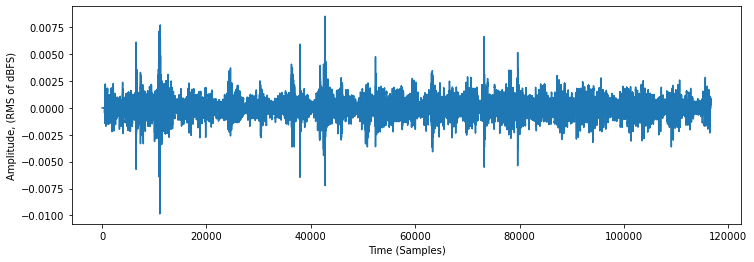

In [32]:
#Randomly select a file from validation set 
import random
drink_or_eat = str(random.randint(0,1))
file_num = str(random.randint(1,22))
if drink_or_eat == '0': 
    string="drinking"
elif drink_or_eat == '1': 
    string ="eating"
testfile = string+"_"+file_num+".wav"

#File to be analyzed
# filename='datasets/'+testfile            #Random 
filename = 'datasets/drinking_21.wav'    #Manual  
print("File to be analyzed by the model: "+filename,"\n")

#Feeding the audio data into the model
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
librosa_audio_data,librosa_sample_rate=librosa.load(filename)
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)
plt.xlabel("Time (Samples)")
plt.ylabel("Amplitude, (RMS of dBFS)")

print("Extracted spectral feature array: \n")
print(mfccs_scaled_features)
# playsound.playsound(filename)

mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
predicted_label=(model.predict(mfccs_scaled_features) > 0.5).astype("int32")
print("\nModel outcome Label: ", predicted_label)

#Interpreting the analyzed data from model 
if predicted_label[0][0] == 1: 
    final_behavior = "Drinking"
elif predicted_label[0][0] == 0: 
    final_behavior = "Eating"
    
print("\nFinal classified behavior: "+final_behavior) 

File to be analyzed by the model: datasets/eating_5.wav 

Extracted spectral feature array: 

[-5.2149023e+02  6.6450699e+01 -1.2972436e+01  1.4078037e+01
  3.2604963e-02  3.0403479e+01 -4.9138861e+00  1.3781781e+01
  5.0086489e+00  1.6732265e+01 -1.9522897e+00  6.6729889e+00
 -1.1771257e+00  4.8939767e+00 -2.7371774e+00  8.3950796e+00
  1.6106124e-01  7.7807097e+00  2.7558875e+00  7.0147691e+00
  3.7414813e+00  4.0861931e+00  2.5887513e+00  2.5128393e+00
  2.2022827e+00  4.2956429e+00  2.1469505e+00  2.8059988e+00
  2.2078645e+00  2.3416860e+00  1.9068210e+00  2.6397085e+00
  2.3773303e+00  3.0706356e+00  2.9137659e+00  1.6226692e+00
  1.6587944e+00  1.1424657e+00  7.5651252e-01  1.0475270e+00]

Model outcome Label:  [[0 1]]
Confidency: [0.17877708 0.8212229 ]

Final classified behavior: None


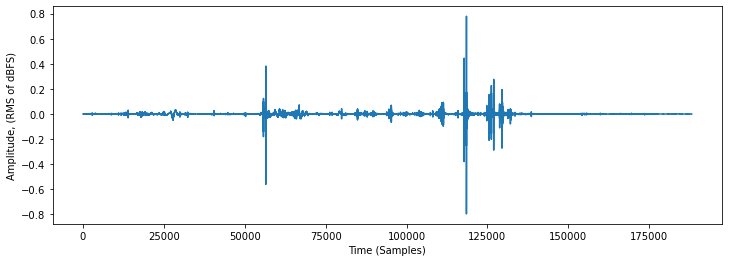

In [92]:
# Confidency Update Version.

#Randomly select a file from validation set 
import random
drink_or_eat = str(random.randint(0,1))
file_num = str(random.randint(1,22))
if drink_or_eat == '0': 
    string="drinking"
elif drink_or_eat == '1': 
    string ="eating"
testfile = string+"_"+file_num+".wav"

#File to be analyzed
filename='datasets/'+testfile            #Random 
# filename = 'datasets/drinking_21.wav'    #Manual  
print("File to be analyzed by the model: "+filename,"\n")

#Feeding the audio data into the model
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
librosa_audio_data,librosa_sample_rate=librosa.load(filename)
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)
plt.xlabel("Time (Samples)")
plt.ylabel("Amplitude, (RMS of dBFS)")

print("Extracted spectral feature array: \n")
print(mfccs_scaled_features)
# playsound.playsound(filename)

mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
predicted_label=(model.predict(mfccs_scaled_features) > 0.5).astype("int32")
print("\nModel outcome Label: ", predicted_label)

# predicted_proba_vector = model.predict_proba(mfccs_scaled_features) 
# predicted_proba = predicted_proba_vector[0]
# for i in range(len(predicted_proba)): 
#     category = le.inverse_transform(np.array([i]))
#     print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

# confidency = model.predict(mfccs_scaled_features)
# predict_confidency = np.argmax(confidency)
# print("Confidency:", predict_confidency)

confidency = model.predict(mfccs_scaled_features)
print("Confidency:",confidency[0])

#Interpreting the analyzed data from model 

# Parameter for how sensitive the model would be. 
# Confidency below this parameter will be regarded as "None"
sensitivity_parameter = 0.85

if predicted_label[0][0] == 1 and confidency[0][0] > sensitivity_parameter: 
    final_behavior = "Drinking"
elif predicted_label[0][0] == 0 and confidency[0][1] > sensitivity_parameter: 
    final_behavior = "Eating"
else: 
    final_behavior = "None"
    
print("\nFinal classified behavior: "+final_behavior) 



In [35]:
import os 
os.system(filename) 

1